In [1]:
import pandas as pd

In [2]:
trained=pd.read_csv('salaries_data.csv')

In [3]:
trained.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250,USD,140250,US,100,US,M
1,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
2,2021,MI,FT,BI Data Analyst,100000,USD,100000,US,100,US,M
3,2021,MI,CT,ML Engineer,270000,USD,270000,US,100,US,L
4,2021,MI,FT,Data Engineer,22000,EUR,26005,RO,0,US,L


In [4]:
trained = trained.drop(['salary', 'salary_currency'], axis=1)

In [5]:
trained.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250,US,100,US,M
1,2022,SE,FT,Data Engineer,135000,US,100,US,M
2,2021,MI,FT,BI Data Analyst,100000,US,100,US,M
3,2021,MI,CT,ML Engineer,270000,US,100,US,L
4,2021,MI,FT,Data Engineer,26005,RO,0,US,L


In [6]:
trained.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           500 non-null    int64 
 1   experience_level    500 non-null    object
 2   employment_type     500 non-null    object
 3   job_title           500 non-null    object
 4   salary_in_usd       500 non-null    int64 
 5   employee_residence  500 non-null    object
 6   remote_ratio        500 non-null    int64 
 7   company_location    500 non-null    object
 8   company_size        500 non-null    object
dtypes: int64(3), object(6)
memory usage: 35.3+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
import pylab as plt
import seaborn as sns
import numpy as np

%matplotlib inline   

In [9]:
le = LabelEncoder()

In [10]:
column=['experience_level', 'employment_type', 'job_title','company_size','employee_residence','company_location','company_size']

In [11]:
for column in trained.columns:
    if trained[column].dtype == type(object):
        trained[column] = le.fit_transform(trained[column])

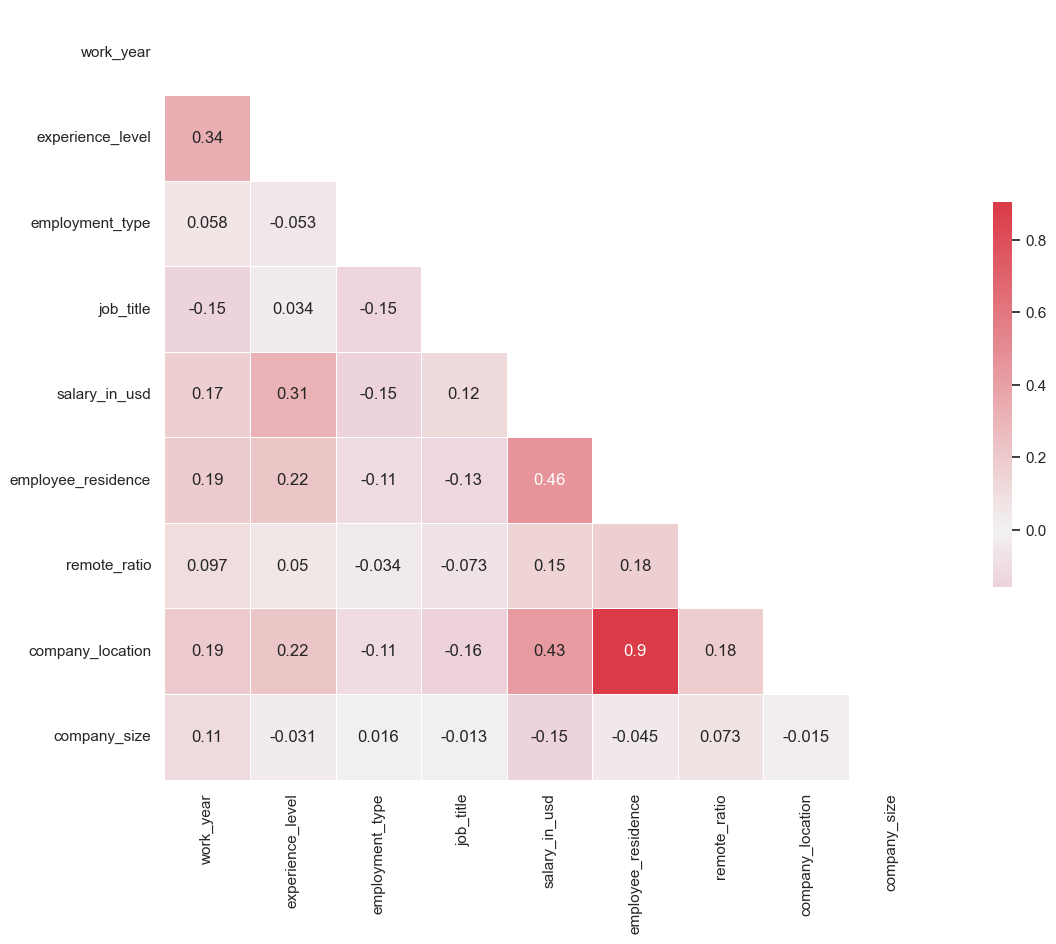

In [12]:
plt.figure(figsize=(15, 10))      

sns.set(style='white')

mask=np.triu(np.ones_like(trained.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(trained.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [28]:
X=trained[['experience_level', 'employment_type', 'job_title','company_size','company_location','employee_residence','company_size']]  
y=trained['salary_in_usd']

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

In [31]:
X_scaled = scaler.fit_transform(X)

In [32]:
from sklearn.model_selection import train_test_split as tts

In [33]:
X_train, X_test, y_train, y_test  = tts(X, y, train_size=0.8, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 7), (100, 7), (400,), (100,))

In [34]:
#%pip install lazypredict

In [35]:
from lazypredict.Supervised import LazyRegressor

In [36]:
lazy=LazyRegressor()

In [37]:
lazy.fit(X_train, X_test, y_train, y_test)

100%|████████████████████████████████████████████████████████████████████████████████| 42/42 [00:00<00:00, 1834.55it/s]


(Empty DataFrame
 Columns: [Adjusted R-Squared, R-Squared, RMSE, Time Taken]
 Index: [],
 Empty DataFrame
 Columns: [Adjusted R-Squared, R-Squared, RMSE, Time Taken]
 Index: [])

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [39]:
model = LinearRegression()

In [40]:
model.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = model.predict(X_test)

In [42]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred, squared=False)
mse

53220.8023565777

In [43]:
tested=pd.read_csv('testeo.csv')

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
import pylab as plt
import seaborn as sns
import numpy as np

%matplotlib inline 

In [46]:
le = LabelEncoder()

In [47]:
column=['experience_level', 'employment_type', 'job_title','company_size','employee_residence','company_location','company_size']

In [48]:
for column in tested.columns:
    if tested[column].dtype == type(object):
        tested[column] = le.fit_transform(tested[column])

In [49]:
X=tested[['experience_level', 'employment_type', 'job_title','company_size','company_location','employee_residence','company_size']]  

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()

In [52]:
X_scaled = scaler.fit_transform(X)

In [53]:
from lazypredict.Supervised import LazyRegressor

In [54]:
model.fit(X_train, y_train)

LinearRegression()

In [55]:
y_pred = model.predict(X_test)

In [56]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred, squared=False)
mse

53220.8023565777

In [57]:
muestra1=pd.read_csv('muestra.csv')

In [58]:
muestra1['salary_in_usd']= y_pred

ValueError: Length of values (100) does not match length of index (107)